# UNIT THREE - Image Analyzation

In [14]:
#RUN THIS FIRST TO IMPORT LIBRARIES

from imageio import imread
from PIL import Image , ImageChops
import imageio
import cv2
from imutils import paths

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

### Assignment of tasks
I.  Raster Type Image - Danny and Rod
1. Anti-aliasing or Antialiasing 
       1.1 Crop - Danny
       1.2 Resizing - Danny
2. Grayscale - Danny
3. Buffer - Danny
4. Channels - Danny
5. Layers (3 Images which  can be manipulated and merge as one ) from this image you will do the same analyzation
       Anti-aliasing 
       5.1.1 Crop - Rod
       5.1.2 Resizing - Rod
       5.2. Grayscale - Rod
       5.3. Buffer - Rod
       5.4. Channels - Rod

II.  Vector Type Image - Allyn and Charmaine
1. Anti-aliasing or Antialiasing 
       1.1 Crop - Allyn
       1.2 Resizing - Allyn
2. Grayscale - Allyn
3. Buffer - Allyn
4. Channels - Allyn
5. Layers (3 Images which  can be manipulated and merge as one ) from this image you will do the same analyzation
       Anti-aliasing
       5.1.1 Crop - Charmaine
       5.1.2 Resizing - Charmaine
       5.2. Grayscale - Charmaine
       5.3. Buffer - Charmaine
       5.4. Channels - Charmaine

In [2]:
#Function to Show Image Properties
def img_wdisplay_properties(image_name):
    print("IMAGE TO BE ANALYZED:")
    show_image(image_name)
    print('Type of the image : ' , type(image_name))
    print('Shape of the image : {}'.format(image_name.shape))
    print('Image Height : {}'.format(image_name.shape[0]))
    print('Image Width : {}'.format(image_name.shape[1]))
    print('Dimension of Image : {}'.format(image_name.ndim))
    print('Image size : {}'.format(image_name.size))
    print('Maximum RGB value in this image : {}'.format(image_name.max()))
    print('Minimum RGB value in this image : {}'.format(image_name.min()))

#Function to Show Image
def show_image(image):
    plt.imshow(image)
    plt.show()

#Function to Crop Image
def crop_image(image, crop_upper_left,crop_bottom_right):
    print("\nCROP")
    htop= int(image.shape[0] * crop_upper_left/100) #top
    hbot = int(image.shape[0] * crop_bottom_right/100) #bottom
    wleft = int(image.shape[1] * crop_upper_left/100) #left
    wright = int(image.shape[1] * crop_bottom_right/100) #right
    cropped_image = image[htop:hbot,wleft:wright]
    show_image(cropped_image)
    
#Function to Resize raster image
def resize_r_image(image):
    print("RESIZE")
    resize_percent = 40
    width = int(image.shape[1] * resize_percent/100)
    height = int(image.shape[0] * resize_percent/100)
    new_dim = (width,height)
    resized = cv2.resize(image, new_dim, interpolation = cv2.INTER_AREA)
    show_image(resized)
    
#Function to Resize vector image
def resize_v_image(image):
    print("RESIZE")
    resize_percent = 200
    height = int(image.shape[0] * resize_percent/100)
    width = int(image.shape[1] * resize_percent/100)
    resized_image = np.resize(image,(width,height,3))
    show_image(resized_image)

#Function to Grayscale image
def to_gray(image):
    print("GRAYSCALE")
    grayed = np.dot(image[...,:3], [0.299, 0.587, 0.144])
    plt.imshow(grayed, cmap=plt.get_cmap('gray'))
    plt.show()
    
#Function to Buffer
def buffer_image(image_name):
    print("BUFFER")
    image_copy = image_name.copy()
    divBy6 = int(image_copy.shape[0] / 6)
    image_copy[divBy6:int(divBy6*2),:,0] = 255 # full intensity to those pixel's R channel
    image_copy[int(divBy6*3):int(divBy6*4),:,1] = 255 # full intensity to those pixel's G channel
    image_copy[int(divBy6*5):image_copy.shape[0],:,2] = 255 # full intensity to those pixel's B channel
    show_image(image_copy)

#Function to Channel
def channel_image(image_name,channel_list):
    print("CHANNEL") #0 is red, 1 is green, 2 is blue
    color = ["Red","Green","Blue"]
    for i in channel_list:
        print(color[i])
        show_image(image_name[:,:,i])  
    
def do_all_raster(image_list,crop_val1,crop_val2,channel_list):
    for i in range(len(image_list)):
        img_wdisplay_properties(image_list[i])
        crop_image(image_list[i],crop_val1,crop_val2)
        resize_r_image(image_list[i])
        to_gray(image_list[i])
        buffer_image(image_list[i])
        channel_image(image_list[i],channel_list)
        
def do_all_vector(image_list,crop_val1,crop_val2,channel_list):
    for i in range(len(image_list)):
        img_wdisplay_properties(image_list[i])
        crop_image(image_list[i],crop_val1,crop_val2)
        resize_v_image(image_list[i])
        to_gray(image_list[i])
        buffer_image(image_list[i])
        channel_image(image_list[i],channel_list)

## UNLAYERED RASTER IMAGE

In [17]:
#Read images
sample = cv2.imread("./Data/cat.jpg") #Open the image using cv
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
# imagePaths = list(paths.list_images('./Data/'))
# lastimage = len(imagePaths)
# lastimage += 1
# cv2.imwrite('./Data/cat{}.jpg'.format(lastimage),sample)

True

IMAGE TO BE ANALYZED:


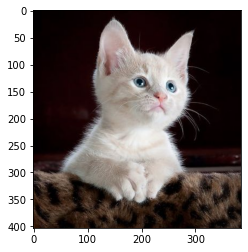

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (403, 385, 3)
Image Height : 403
Image Width : 385
Dimension of Image : 3
Image size : 465465
Maximum RGB value in this image : 255
Minimum RGB value in this image : 0

CROP


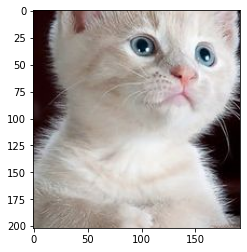

RESIZE


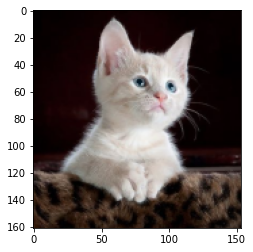

GRAYSCALE


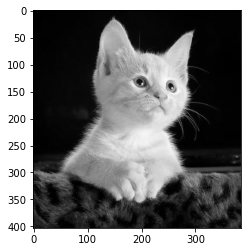

BUFFER


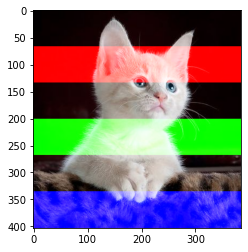

CHANNEL
Red


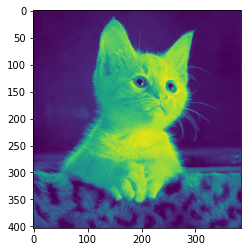

Green


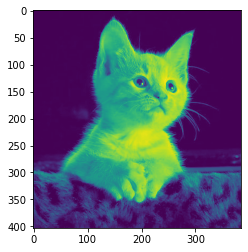

Blue


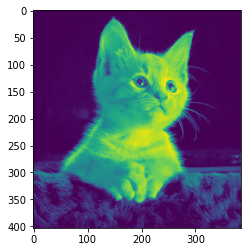

In [14]:
crop_val1 = 25 #crop value 1 is percentage for the starting height from 0 and starting width from 0. image is 100%
crop_val2 = 75 #crop value 2 is percentage for the end width from 0 and end height from 0
img_list = [sample]
channel_list = [0,1,2]
do_all_raster(img_list,crop_val1,crop_val2,channel_list)

## LAYERED RASTER IMAGE

In [42]:
Mars = cv2.imread("./Data/MarsSurface.png") #main background image
rover= cv2.imread("./Data/perseverance_transparent.png") #first image to paste on top
Elon = cv2.imread("./Data/elonMusk.png") #second iamge to paste on top

In [43]:
#because cv2 expects BGR images and matplotlib expects RGB, we need to convert BGR to RGB before using plt.imshow
Mars = cv2.cvtColor(Mars, cv2.COLOR_BGR2RGB)
rover = cv2.cvtColor(rover, cv2.COLOR_BGR2RGB)
Elon = cv2.cvtColor(Elon, cv2.COLOR_BGR2RGB)

rover = cv2.resize(rover, (1272,526))#resizing the two images to be pasted on top to achieve my target result
Elon = cv2.resize(Elon, (500,500))

5. Layered Images


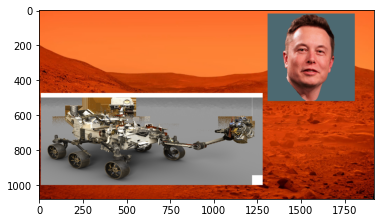

In [44]:
Mars[474:1000,10:1282] = rover #layering the two images on the main background
Mars[20:520,1310:1810] = Elon
print("5. Layered Images")
show_image(Mars)

IMAGE TO BE ANALYZED:


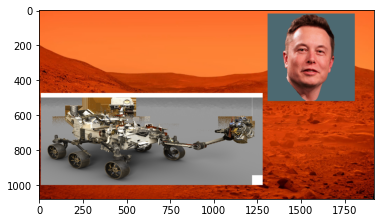

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (1080, 1920, 3)
Image Height : 1080
Image Width : 1920
Dimension of Image : 3
Image size : 6220800
Maximum RGB value in this image : 255
Minimum RGB value in this image : 0

CROP


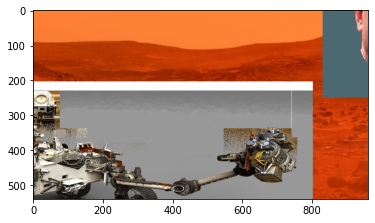

RESIZE


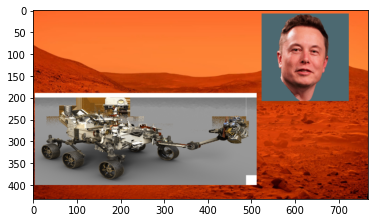

GRAYSCALE


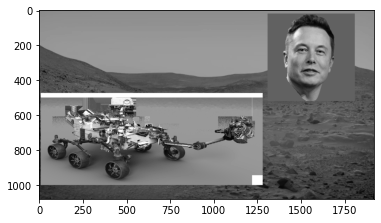

BUFFER


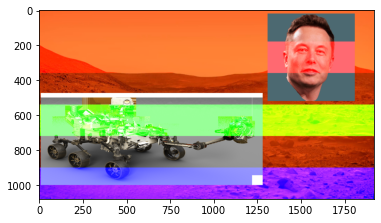

CHANNEL
Red


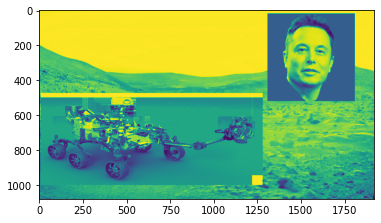

Green


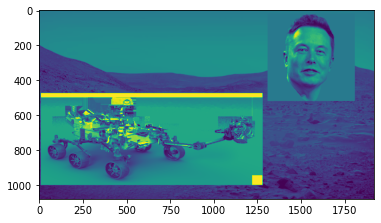

Blue


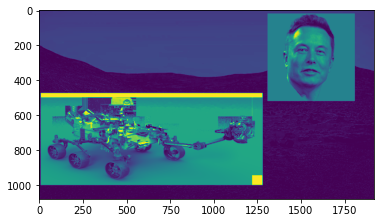

In [45]:
image_list = [Mars]
do_all_raster(image_list)

## UNLAYERED VECTOR IMAGE

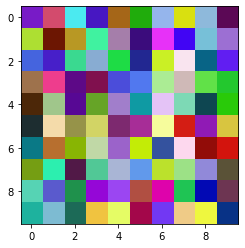

In [50]:
width_, height_ = 10, 10 #width and height of the image
#Vector image
vector_img = np.array(
    np.array([
              np.array([np.random.randint( 0,255,3) for x in range(width_)]) for x in range(height_)
    ])
)
show_image(vector_img)

IMAGE TO BE ANALYZED:


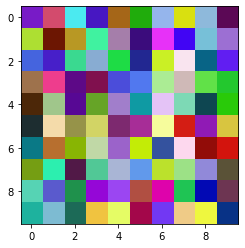

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (10, 10, 3)
Image Height : 10
Image Width : 10
Dimension of Image : 3
Image size : 300
Maximum RGB value in this image : 253
Minimum RGB value in this image : 2

CROP


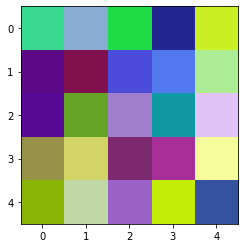

RESIZE


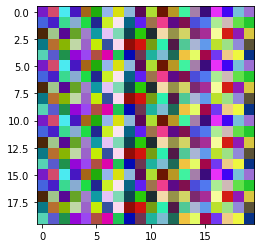

GRAYSCALE


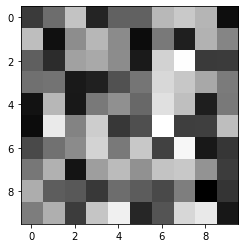

BUFFER


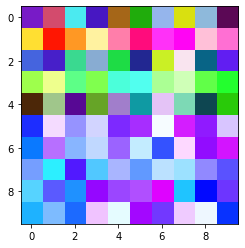

CHANNEL
Red


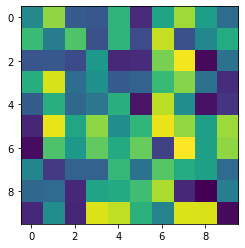

Green


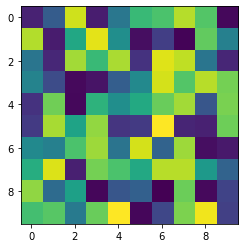

Blue


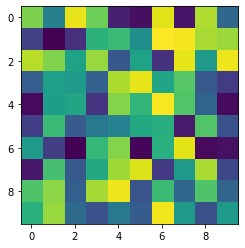

In [51]:
image_list = [vector_img]
do_all_vector(image_list)

## LAYERED VECTOR IMAGE

First vector image


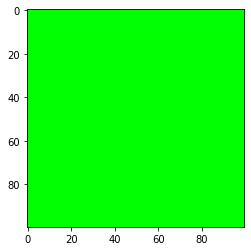

In [52]:
width1, height1 = 100,100 #width and height of the first image
width2, height2 = 20,20 #width and height of the second and third image
#first vector image
print("First vector image")
vector_image1 = np.array(
    np.array([
              np.array([(0,255,0) for x in range(width1)]) for x in range(height1)
    ])
)
show_image(vector_image1)

Second vector image


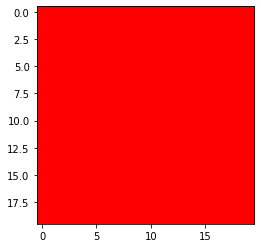

In [53]:
#second vector image
print("Second vector image")
vector_image2 = np.array(
    np.array([
              np.array([(255,0,0) for x in range(width2)]) for x in range(height2)
    ])
)
show_image(vector_image2)

Third vector image


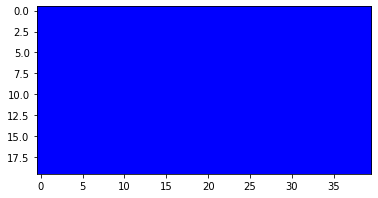

In [54]:
#third vector image
print("Third vector image")
vector_image3 = np.array(
    np.array([
              np.array([(0,0,255) for x in range(width2*2)]) for x in range(height2)
    ])
)
show_image(vector_image3)

Result:


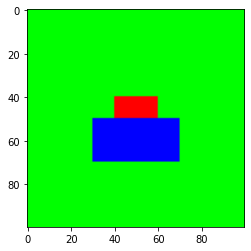

In [55]:
#Layering
vector_image1[40:60,40:60] = vector_image2
vector_image1[50:70,30:70] = vector_image3

print("Result:")
show_image(vector_image1) #result

IMAGE TO BE ANALYZED:


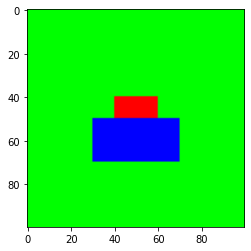

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (100, 100, 3)
Image Height : 100
Image Width : 100
Dimension of Image : 3
Image size : 30000
Maximum RGB value in this image : 255
Minimum RGB value in this image : 0

CROP


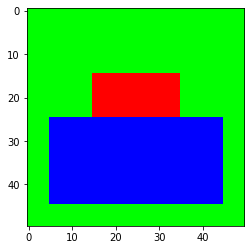

RESIZE


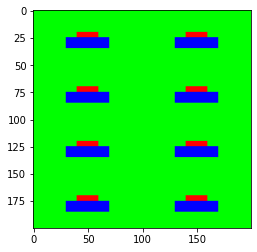

GRAYSCALE


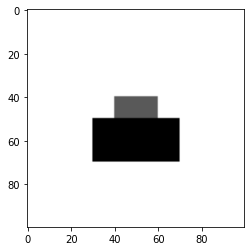

BUFFER


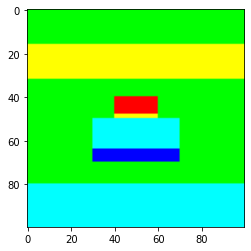

CHANNEL
Red


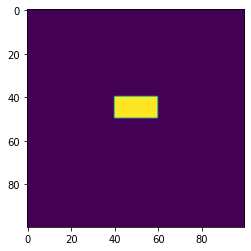

Green


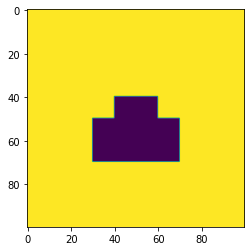

Blue


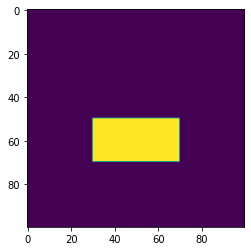

In [56]:
img_list = [vector_image1]
do_all_vector(img_list)

END OF FILE